<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%22mnist_keras_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Создаем последовательную модель
model = Sequential();
# Добавляем уровни сети
#скрытый слой 15 нейронов
model.add(Dense(15, input_dim=784, activation="relu", kernel_initializer="normal"))
#выходной слой 10 нейронов
model.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
sgd = keras.optimizers.SGD(learning_rate=1)
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())
# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model.fit(X_train, Y_train, batch_size=32, epochs=2000);
#model.fit(X_train, Y_train, batch_size=32, epochs=2000, verbose=2, validation_split=0.2);

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                11775     
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1465 - accuracy: 0.6854
Epoch 2/2000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4284 - accuracy: 0.8815
Epoch 3/2000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3584 - accuracy: 0.8979
Epoch 4/2000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3298 - accuracy: 0.9055
Epoch 5/2000
1875/1875 [=

Точность растет очень медленно: на больших эпохах по несколько тысячных процента.

длина:
11760
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 65.00
Процентное точных нулей: 0.5527%
количество пороговых нулей (Т=0.0001): 9.00
Процентное точных нулей: 0.0765%
количество пороговых нулей (Т=0.00001): 2.00
Процентное точных нулей: 0.0170%


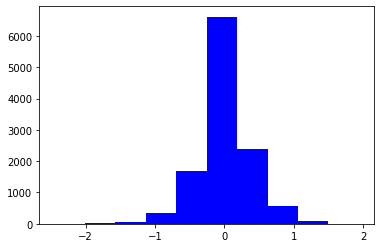

In [ ]:
a = np.array(model.get_weights()[0]).flatten();
plt.hist(a, facecolor='blue')
#plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
#print("вектор:")
#print(a)
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/11760)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/11760)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/11760)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/11760)*100))

(11760,)
(150,)


hidden layer: max = 166.6872,
 min = 3.4655
[  3.4655448   94.69718878  97.42618235 115.45297887 119.93370044
 147.14780351 166.68721647 141.88151187 127.37229985 107.64753658
 109.31243468 116.50475727 110.91843437 111.49320927  53.59429926]


out layer: max = 85.4695,
 min = 42.1046
[71.41132285 70.69041052 61.0373631  70.63171909 78.74388152 69.62566817
 73.60980971 53.94469448 59.50970252 85.46946396 56.77801478 42.10464338
 59.99058343 58.73952067 65.36945498]


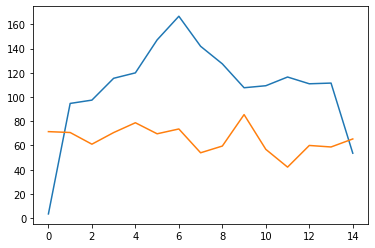

In [ ]:
weight_origin=model.layers[0].get_weights()[0].flatten()
weight_origin2=model.layers[1].get_weights()[0].flatten()
dense1 = model.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортироватьweight_origin.sort()weight_origin2.sort()



layer1 = np.empty(15)
layer2 = np.empty(15)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
#print(x)

for i in range(15):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1
for i in range(15):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


Теперь увеличим число нейронов на скрытом слое (15 ->1 500). 

---



#Большая сеть

In [3]:
# Создаем последовательную модель
model2 = Sequential();

# Добавляем уровни сети
#скрытый слой 1500 нейронов
model2.add(Dense(1500, input_dim=784, activation="relu", kernel_initializer="normal"))
#выходной слой 10 нейронов
model2.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model2.summary())

# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model2.fit(X_train, Y_train, batch_size=32, epochs=10);

# Оцениваем качество обучения сети на тестовых данных
scores = model2.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 10)                15010     
                                                                 
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4867 - accuracy: 0.8750
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2802 - accuracy: 0.9227
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2367 - accuracy: 0.9355
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2088 - accuracy: 0.9430
Epoch 5/10
1875/1875 [===

длина:
1176000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 18555.00
Процентное точных нулей: 1.5778%
количество пороговых нулей (Т=0.0001): 1931.00
Процентное точных нулей: 0.1642%
количество пороговых нулей (Т=0.00001): 173.00
Процентное точных нулей: 0.0147%


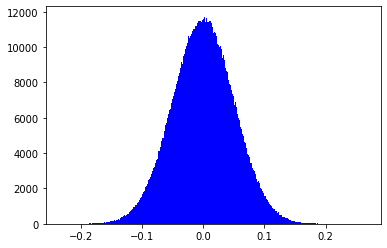

In [4]:
a = np.array(model2.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
##
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model2.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model2.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model2.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model2.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/1176000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/1176000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/1176000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/1176000)*100))

(1176000,)
(15000,)


hidden layer: max = 2.3871,
 min = 1.6229
dense max = 0.0396
dence min = -0.0274
[1.99640992 1.95313722 2.0655427  ... 2.03371914 1.9446976  2.08274303]


out layer: max = 0.2715,
 min = 0.0062
[0.11217213 0.04235532 0.10564562 ... 0.04749467 0.04601719 0.09002895]


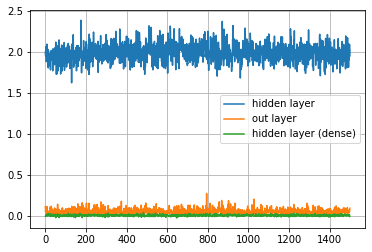

In [6]:
weight_origin=model2.layers[0].get_weights()[0].flatten()
weight_origin2=model2.layers[1].get_weights()[0].flatten()
dense1 = model2.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
#weight_origin.sort()
#weight_origin2.sort()

layer1 = np.empty(1500)
layer2 = np.empty(1500)
x = range(1500)


for i in range(1500):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(1500):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


#5000 НЕЙРОНОВ

In [7]:
# Создаем последовательную модель
model3 = Sequential();

# Добавляем уровни сети
#скрытый слой 1500 нейронов
model3.add(Dense(5000, input_dim=784, activation="relu", kernel_initializer="normal"))
#выходной слой 10 нейронов
model3.add(Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal"))

# Компилируем модель
model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model3.summary())

# Обучаем сеть
#Batch size – количество обучающих примеров за одну итерацию.
model3.fit(X_train, Y_train, batch_size=32, epochs=10);

# Оцениваем качество обучения сети на тестовых данных
scores = model3.evaluate(X_test, Y_test, verbose=0);
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5000)              3925000   
                                                                 
 dense_3 (Dense)             (None, 10)                50010     
                                                                 
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3591 - accuracy: 0.8996
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2135 - accuracy: 0.9401
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1753 - accuracy: 0.9521
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1516 - accuracy: 0.9587
Epoch 5/10
1875/187

длина:
3920000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 62534.00
Процентное точных нулей: 1.5953%
количество пороговых нулей (Т=0.0001): 6462.00
Процентное точных нулей: 0.1648%
количество пороговых нулей (Т=0.00001): 621.00
Процентное точных нулей: 0.0158%


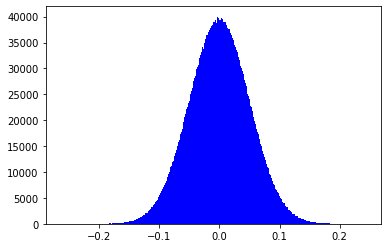

In [8]:
a = np.array(model3.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model3.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model3.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model3.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model3.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/3920000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/3920000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/3920000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/3920000)*100))

(3920000,)
(50000,)


hidden layer: max = 2.3635,
 min = 1.6119
dense max = 0.0172
dence min = -0.0173
[2.13528603 1.89468347 1.86182666 ... 2.0220755  1.96616151 1.96353315]


out layer: max = 0.1245,
 min = 0.0025
[0.03422008 0.02293602 0.02394624 ... 0.02741817 0.06082014 0.01544206]


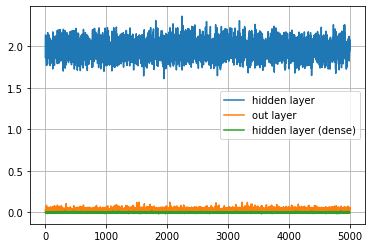

In [9]:
weight_origin=model3.layers[0].get_weights()[0].flatten()
weight_origin2=model3.layers[1].get_weights()[0].flatten()
dense1 = model3.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#отсортировать
#weight_origin.sort()
#weight_origin2.sort()

layer1 = np.empty(5000)
layer2 = np.empty(5000)
x = range(5000)


for i in range(5000):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(5000):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()
